In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

In [2]:
# http://hunkim.github.io/ml/   -   Linear Regression의 개념 비디오 강의슬라이드, 실습슬라이드 참고

## 단순 선형 회귀 모델

74.666664
70.98
67.386665
63.88667
60.479992
57.166668
53.946674
50.819996
47.78667
44.84666
42.0
39.246666
36.586662
34.020004
31.546667
29.166666
26.88
24.686666
22.58667
20.58
18.666666
16.846666
15.12
13.486667
11.946668
10.5
9.146666
7.886667
6.72
5.646666
4.6666665
3.78
2.986667
2.2866664
1.68
1.1666666
0.7466666
0.42000008
0.18666662
0.04666671
0.0
0.04666671
0.18666674
0.41999987
0.7466665
1.1666666
1.6800003
2.2866673
2.986666
3.7799995
4.6666665
5.646666
6.720001
7.8866653
9.146668
10.5
11.946666
13.486669
15.119998
16.84667
18.666666
20.579996
22.58667
24.686666
26.880005
29.166666
31.546661
34.020004
36.586662
39.24667
42.0
44.84666
47.786663
50.820007
53.946674
57.166668
60.479992
63.886658
67.386665
70.98


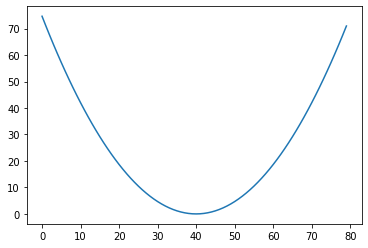

In [10]:
# 데이터 준비
x_train = [1, 2, 3] # 입력값
y_train = [1, 2, 3] # 결과값

# wx + b = y  
# x_train, y_train 값에 위의 식이 적합하려면
# w = 1, b = 0의 값이 나와야한다
# tensorflow는 이 값을 찾아줌

W = tf.placeholder(tf.float32)

# 가설 준비(Wx + b)
hypot = W * x_train # 가중치 기준으로 준비하기, b는 일단 제외시켜보자

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypot - y_train))   
# tf.square : 제곱 / tf.reduce_mean : 전체데이터 평균 구해줌
# --------------------- 텐서플로우의 그래프 완성 --------------------- # 


# 비용함수를 그래프로 그리기
sess = tf.Session()

cost_val=[]

for i in range(-30, 50) :
    cost_result = sess.run(cost, feed_dict={W:i*0.1}) 
    # cost : 최종값만 입력하면 앞에 다 처리됨
    # feed_dict={W:i*0.1} : hypot에 입력값은 준비가 되었는데 W값은 뭔지 모름 / W에 i*0.1 씩 학습시키겠다
    
    print(cost_result) 
    # cost_result : W가 찾고자하는 비용 최저점 찾기  
    
    cost_val.append(cost_result)
    
# 그래프 
plt.plot(cost_val)
# 경사하강(Gradient Descent)
# learning rate
    
sess.close()

### 경사하강 알고리즘을 이용한 가중치 학습

In [51]:
# 데이터 준비
x_train = [1, 2, 3] # 입력값
y_train = [1, 2, 3] # 결과값

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
# tf.random.normal([1]) : 랜덤값 지정 / name="Weight" : 변수 이름지정
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
    # Linear Regression cost 함수 최소화 강의슬라이드 참고
    # Gradient descent algorithm(p.17) 공식
learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train)*x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)
# 알파값(learning_rate)은 파라미터 값, cost 줄이는 gradient 선택하기 
# tensorflow에는 같은 변수에 바로 할당(W = W.ksjfkdf)할수없어서 assign 사용

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21) :
    _, c, w = sess.run([update, cost, W])
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 31.310312271118164, W : [-0.0237335]
step : 1, cost : 13.515498161315918, W : [0.4540088]
step : 2, cost : 7.087120056152344, W : [0.7088047]
step : 3, cost : 4.529674053192139, W : [0.84469587]
step : 4, cost : 3.4134607315063477, W : [0.9171711]
step : 5, cost : 2.888620376586914, W : [0.9558246]
step : 6, cost : 2.628751277923584, W : [0.9764398]
step : 7, cost : 2.495856523513794, W : [0.98743457]
step : 8, cost : 2.426600694656372, W : [0.9932984]
step : 9, cost : 2.3901262283325195, W : [0.9964258]
step : 10, cost : 2.3708040714263916, W : [0.9980938]
step : 11, cost : 2.3605360984802246, W : [0.9989834]
step : 12, cost : 2.3550703525543213, W : [0.9994578]
step : 13, cost : 2.352158784866333, W : [0.9997108]
step : 14, cost : 2.3506064414978027, W : [0.99984574]
step : 15, cost : 2.3497791290283203, W : [0.99991775]
step : 16, cost : 2.349337577819824, W : [0.99995613]
step : 17, cost : 2.349102258682251, W : [0.9999766]
step : 18, cost : 2.3489768505096436, W :

In [50]:
# x_train, y_train 제대로 주어지지 않은 상태에서 데이터 예측

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
    # Linear Regression cost 함수 최소화 강의슬라이드 참고
    # Gradient descent algorithm(p.17) 공식
learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train)*x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)
# 알파값(learning_rate)은 파라미터 값, cost 줄이는 gradient 선택하기 
# tensorflow에는 같은 변수에 바로 할당(W = W.ksjfkdf)할수없어서 assign 사용

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100) :
    _, c, w = sess.run([update, cost, W], feed_dict={x_train:[1, 2, 3, 4], y_train:[1, 2, 3, 4]}) # x_train에는 4개의 값 넘겨주기 
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 22.773441314697266, W : [0.69332623]
step : 1, cost : 5.273974418640137, W : [0.92333156]
step : 2, cost : 2.882951021194458, W : [0.9808329]
step : 3, cost : 2.4091854095458984, W : [0.9952082]
step : 4, cost : 2.2984933853149414, W : [0.99880207]
step : 5, cost : 2.2713046073913574, W : [0.99970055]
step : 6, cost : 2.2645373344421387, W : [0.99992514]
step : 7, cost : 2.262847900390625, W : [0.9999813]
step : 8, cost : 2.262425422668457, W : [0.99999535]
step : 9, cost : 2.262319564819336, W : [0.9999988]
step : 10, cost : 2.262293815612793, W : [0.9999997]
step : 11, cost : 2.262287139892578, W : [0.99999994]
step : 12, cost : 2.2622852325439453, W : [1.]
step : 13, cost : 2.262284755706787, W : [1.]
step : 14, cost : 2.262284755706787, W : [1.]
step : 15, cost : 2.262284755706787, W : [1.]
step : 16, cost : 2.262284755706787, W : [1.]
step : 17, cost : 2.262284755706787, W : [1.]
step : 18, cost : 2.262284755706787, W : [1.]
step : 19, cost : 2.262284755706787, W 

In [48]:
# 경사하강알고리즘 자체를 해주는 객체 사용

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)# minimize 에 가설 공식 넣어주면 됨

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21) :
    _, c, w = sess.run([train, cost, W], feed_dict={x_train:[1, 2, 3, 4], y_train:[1, 2, 3, 4]}) # x_train에는 4개의 값 넘겨주기 
    # 제일 마지막 단계 update만 넣어주면 나머진 다 알아서 실행된다요오오오오오오옹로오
    # 근데 cost랑 W 값 궁금하니까 얘네도 return해주세요 
    #  _, c, w : update는 제외하고 c, w 값만 받아보자
    print("step : {}, cost : {}, W : {}".format(step, c, w))
    
sess.close()

step : 0, cost : 1.1947587728500366, W : [0.66248393]
step : 1, cost : 0.8296979665756226, W : [0.7123737]
step : 2, cost : 0.5763856768608093, W : [0.7539509]
step : 3, cost : 0.4006136655807495, W : [0.7886038]
step : 4, cost : 0.27864524722099304, W : [0.81748873]
step : 5, cost : 0.19400988519191742, W : [0.84156895]
step : 6, cost : 0.13527919352054596, W : [0.8616468]
step : 7, cost : 0.09452325850725174, W : [0.87839055]
step : 8, cost : 0.06623974442481995, W : [0.8923571]
step : 9, cost : 0.04661041498184204, W : [0.9040101]
step : 10, cost : 0.03298626095056534, W : [0.913736]
step : 11, cost : 0.023528777062892914, W : [0.9218564]
step : 12, cost : 0.016962707042694092, W : [0.92863953]
step : 13, cost : 0.012402765452861786, W : [0.9343086]
step : 14, cost : 0.009234962053596973, W : [0.93904954]
step : 15, cost : 0.007033143192529678, W : [0.9430174]
step : 16, cost : 0.005501613020896912, W : [0.9463412]
step : 17, cost : 0.004435183946043253, W : [0.94912845]
step : 18, 

In [65]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None]) # shape : 몇개 데이터 넘겨줄지 알려줘야함 / None 1차원으로 넘겨줌
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

# 가설 준비(기본 단순 선형 모델)
hypothesis = W * x_train + b

# 비용함수 준비 # 실습슬라이드 p.7 중간식 참고
cost = tf.reduce_mean(tf.square(hypothesis - y_train))   

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # minimize 에 가설 공식 넣어주면 됨

##################### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000) :
    _, curr_c, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict={x_train:[1, 2, 3, 4, 5],
                                                    y_train:[2.1, 3.1, 4.1, 5.1, 6.1]}) # x_train에는 4개의 값 넘겨주기 
    
    if step % 100 == 0: # 2000번 너무 많으니까 걍 100번에 한번 찍히도록
        print("step : {}, cost : {}, W : {}, bias : {}".format(step, curr_c, curr_w, curr_b))
        
# session 계속 훈련시키기

step : 0, cost : 9.969096183776855, W : [0.3778319], bias : [0.7219428]
step : 100, cost : 0.003398333443328738, W : [1.037719], bias : [0.9638223]
step : 200, cost : 0.0017262387555092573, W : [1.026883], bias : [1.0029436]
step : 300, cost : 0.0008768863044679165, W : [1.01916], bias : [1.030826]
step : 400, cost : 0.00044543101103045046, W : [1.0136558], bias : [1.0506982]
step : 500, cost : 0.000226268355618231, W : [1.0097327], bias : [1.0648613]
step : 600, cost : 0.0001149408271885477, W : [1.0069369], bias : [1.0749557]
step : 700, cost : 5.838323340867646e-05, W : [1.0049438], bias : [1.0821508]
step : 800, cost : 2.9657454433618113e-05, W : [1.0035236], bias : [1.0872784]
step : 900, cost : 1.5063315004226752e-05, W : [1.0025114], bias : [1.0909333]
step : 1000, cost : 7.651731721125543e-06, W : [1.0017899], bias : [1.0935379]
step : 1100, cost : 3.8863063309690915e-06, W : [1.0012757], bias : [1.0953946]
step : 1200, cost : 1.9740641619137023e-06, W : [1.0009092], bias : [1.

In [66]:
# testing
print(sess.run(hypothesis, feed_dict={x_train:[27]}))
print(sess.run(hypothesis, feed_dict={x_train:[2.5, 3.7]}))

sess.close()

[28.101427]
[3.5999317 4.800005 ]


In [157]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.
x_data = [1, 2, 3, 4, 5, 6, 7] # 7시간 일했을때까지
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000] # 각각의 매출액이 얼마인가

X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32, name="bias")

hypo = W * X + b

cost = tf.reduce_mean(tf.square(hypo - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000) :
    _, curr_h, curr_c = sess.run([train, hypo, cost], feed_dict={X:x_data, y:y_data})
    
    if step % 500 == 0:        
        print("step : {}, hypothesis : {}, cost : {}".format(step, curr_h, curr_c))

step : 0, hypothesis : [-0.7621369 -0.918597  -1.0750571 -1.2315173 -1.3879775 -1.5444376
 -1.7008977], cost : 13455145984.0
step : 500, hypothesis : [ 29443.41   54486.055  79528.7   104571.34  129613.984 154656.64
 179699.28 ], cost : 10400110.0
step : 1000, hypothesis : [ 29028.521  54176.156  79323.8   104471.42  129619.06  154766.7
 179914.33 ], cost : 9835889.0
step : 1500, hypothesis : [ 28686.2    53920.453  79154.71  104388.96  129623.21  154857.47
 180091.72 ], cost : 9451773.0
step : 2000, hypothesis : [ 28403.76  53709.48  79015.2  104320.92 129626.64 154932.38 180238.1 ], cost : 9190289.0
step : 2500, hypothesis : [ 28170.723  53535.406  78900.086 104264.77  129629.46  154994.14
 180358.83 ], cost : 9012278.0
step : 3000, hypothesis : [ 27978.453  53391.785  78805.12  104218.445 129631.77  155045.12
 180458.45 ], cost : 8891104.0
step : 3500, hypothesis : [ 27819.82   53273.293  78726.766 104180.24  129633.72  155087.19
 180540.67 ], cost : 8808604.0
step : 4000, hypothesi

In [159]:
# 8시간 일했을 때의 매출액 알기
print(sess.run(hypo, feed_dict={X:[8]}))

sess.close()

[206523.78]


### 다중 선형 회귀모델

In [ ]:
# 여러개의 입력의 Linear Regression  강의슬라이드, lab슬라이드 참고

In [93]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [94]:
# 단순하게 처리하는 경우

X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = W1*X1 + W2*X2 + W3*X3 + b

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

##################### Graph 작업 완료

with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    for step in range(2000) :
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
        if step % 100 == 0: 
            print("step : {}, cost : {}, hypothesis : {}".format(step, co, hy))
            # hypothesis 결과값이 실제 결과값 y_data 와 비슷한지 알아보기

step : 0, cost : 3160.19189453125, hypothesis : [196.37163 247.84644 238.23853 259.26968 191.8765 ]
step : 100, cost : 10.93991470336914, hypothesis : [146.71205 187.91507 179.31421 195.08775 146.11546]
step : 200, cost : 10.373735427856445, hypothesis : [146.83801 187.82875 179.35283 195.11542 146.00243]
step : 300, cost : 9.837379455566406, hypothesis : [146.96062 187.74472 179.39043 195.14233 145.89241]
step : 400, cost : 9.329366683959961, hypothesis : [147.07994 187.66295 179.42702 195.16853 145.78535]
step : 500, cost : 8.84810733795166, hypothesis : [147.19608 187.58334 179.46265 195.19398 145.68114]
step : 600, cost : 8.392243385314941, hypothesis : [147.30911 187.50586 179.4973  195.21878 145.57973]
step : 700, cost : 7.960448265075684, hypothesis : [147.41914 187.4305  179.53107 195.2429  145.48103]
step : 800, cost : 7.55142068862915, hypothesis : [147.52625 187.35712 179.56392 195.2664  145.38501]
step : 900, cost : 7.163971900939941, hypothesis : [147.63046 187.28569 179.5

In [87]:
### Matrix로 처리하는 경우

x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3]) # ?개로 입력되서 3개로 나옴
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) # 위에 X에 5,3 행렬에서 가져올거 3 ([5, 3] * [3, 1])
b = tf.Variable(tf.random_normal([1])) # 마지막 y로 출력하는 개수 1 (위에 [3, 1]에서의 1)

# 가설 설정
hypothesis = tf.matmul(X, W) + b # X, W 행렬곱으로 계산하기

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

##################### Graph 작업 완료

with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    for step in range(2001) :
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X:x_data, y:y_data})
        
        if step % 100 == 0: 
            print("step : {}, cost : {}, hypothesis : {}".format(step, co, hy))
            # hypothesis 결과값이 실제 결과값 y_data 와 비슷한지 알아보기

step : 0, cost : 60519.35546875, hypothesis : [[-68.44322 ]
 [-76.32652 ]
 [-78.084915]
 [-87.8255  ]
 [-54.32952 ]]
step : 100, cost : 4.92209005355835, hypothesis : [[149.90068]
 [185.97198]
 [180.43182]
 [193.69054]
 [145.70654]]
step : 200, cost : 4.732911586761475, hypothesis : [[149.9697 ]
 [185.92413]
 [180.45229]
 [193.71077]
 [145.63913]]
step : 300, cost : 4.553365707397461, hypothesis : [[150.03683]
 [185.87756]
 [180.47215]
 [193.73058]
 [145.57344]]
step : 400, cost : 4.3830342292785645, hypothesis : [[150.10211]
 [185.83228]
 [180.49146]
 [193.74994]
 [145.50945]]
step : 500, cost : 4.221369743347168, hypothesis : [[150.16557]
 [185.78821]
 [180.5102 ]
 [193.7689 ]
 [145.44708]]
step : 600, cost : 4.0679030418396, hypothesis : [[150.22726]
 [185.74535]
 [180.52838]
 [193.78746]
 [145.38628]]
step : 700, cost : 3.922281265258789, hypothesis : [[150.28728]
 [185.70369]
 [180.5461 ]
 [193.80565]
 [145.32707]]
step : 800, cost : 3.784053087234497, hypothesis : [[150.3456 ]
 [

## DASK
    - 가상 데이터프레임
    - 병렬처리용 작업 스케줄러

In [97]:
# 파일 생성 & 저장

%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [101]:
# 파일 가져오기

df1 = pd.read_csv("data/sample1.csv")
df1 # 자동적으로 dataframe형식으로 가져옴 


df1[" c2"].mean() # 컬럼이름앞에 공백있음

2.22

In [103]:
# dask를 이용해보자
import dask.dataframe as dd

df2 = dd.read_csv("data/sample1.csv")
df2 # 실제 데이터 값은 안올라오고 틀만 나타남 / Dask Name: from-delayed, 3 tasks : 데이터를 한번에 불러오고있지 않고있어요...

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [105]:
df2.head() # 필요할때 데이터를 가져와서 쓸수있게끔 해줘요...

C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [109]:
df2[" c2"].mean() # 객체는 생성되어있는데 값이 보이진 않아요...
df2[" c2"].mean().compute() # 값을 보고싶다면 compute!!!

2.22

In [111]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False) 

In [116]:
df3
df3.tail()
df3.count().compute() # 전체데이터 개수 확인

[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s


ID                            171179
Case Number                   171179
Date                          171179
Block                         171179
IUCR                          171179
Primary Type                  171179
Description                   171179
Location Description          170591
Arrest                        171179
Domestic                      171179
Beat                          171178
District                      171178
Ward                          171171
Community Area                171178
FBI Code                      171178
X Coordinate                  170221
Y Coordinate                  170221
Year                          171178
Updated On                    171178
Latitude                      170221
Longitude                     170221
Location                      170221
Historical Wards 2003-2015    169683
Zip Codes                     170221
Community Areas               169754
Census Tracts                 169770
Wards                         169755
B

In [117]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [118]:
%%time
df3.count().compute()

[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.4s
Wall time: 1.45 s


ID                            228750
Case Number                   228750
Date                          228750
Block                         228750
IUCR                          228750
Primary Type                  228750
Description                   228749
Location Description          227938
Arrest                        228749
Domestic                      228749
Beat                          228749
District                      228749
Ward                          228742
Community Area                228748
FBI Code                      228749
X Coordinate                  226295
Y Coordinate                  226295
Year                          228749
Updated On                    228749
Latitude                      226295
Longitude                     226295
Location                      226295
Historical Wards 2003-2015    225562
Zip Codes                     226295
Community Areas               225654
Census Tracts                 225696
Wards                         225656
B

In [119]:
%%time
df3.count().compute(scheduler="processes", num_workers=4)

[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
Wall time: 2.25 s


ID                            241329
Case Number                   241329
Date                          241329
Block                         241329
IUCR                          241329
Primary Type                  241329
Description                   241329
Location Description          240475
Arrest                        241329
Domestic                      241329
Beat                          241329
District                      241329
Ward                          241321
Community Area                241328
FBI Code                      241329
X Coordinate                  238643
Y Coordinate                  238643
Year                          241329
Updated On                    241329
Latitude                      238643
Longitude                     238643
Location                      238643
Historical Wards 2003-2015    237868
Zip Codes                     238643
Community Areas               237965
Census Tracts                 238014
Wards                         237967
B

In [121]:
(df2["c1"] * 3).compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


0    3
1    6
2    9
Name: c1, dtype: int64

In [122]:
df2 = df2.assign(c1=df2["c1"]-3)

In [123]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


[########################################] | 100% Completed |  0.2s


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [126]:
# 새로운 컬럼 추가
df2 = df2.assign(title=df2["c1"].astype(str) + "%")
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


[########################################] | 100% Completed |  0.2s


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [ ]:
# 복수 데이터

In [127]:
%%writefile 'data/sample2.csv'
c1, c2, c3
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing data/sample2.csv


In [128]:
# 복수데이터
df4 = dd.read_csv("data/sample*.csv")
df4.count().compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


c1     6
 c2    6
 c3    6
dtype: int64

## Queue Runner

In [135]:
filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])
key, value = tf.TextLineReader().read(filename_queue)
xy = tf.decode_csv(value, record_defaults=[[0,], [0,], [0,], [0,]])

In [136]:
xy

[<tf.Tensor 'DecodeCSV_1:0' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:1' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:2' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_1:3' shape=() dtype=int32>]

### tf.train.batch

    - Batch : 전체 데이터 일괄처리 (메모리 충분할시에 사용)
    - Stochastic : 한개의 데이터
    - Mini Batch : Batch와 Stochastic의 절충안 (적당한 개수 지정)
    
    + epoch : 전체 셋에 대해 한 번 학습을 완료한 상태

In [146]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10) 
# xy[0:-1] : 0부터 마지막까지 / 독립변수,  xy[-1:] : 뒤에서부터 / 종속변수

In [147]:
# 훈련
X = tf.placeholder(tf.float32, shape=[None, 3]) 
    # ?개의 데이터(몇개가 들어올지 모르니)가 3개의 특성으로 나누어지기
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) 
b = tf.Variable(tf.random_normal([1])) # W에서 출력의 개수 

# 가설
hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis-y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [149]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    for step in range(2001) :
        x_batch, y_batch =  sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        
    coord.request_stop()
    coord.join(threads)
    # thread : 프로세스 안에서 실행되는 작업 단위
    # multi thread : 동시에 여러개의 thread 실행
    # scheduling : 여러개의 thread를 어떤 순서에 의해 동시에 실행할것인지 결정하는것
    #            : 여러 thread들이 아주 짧은 시간동안 번갈아가면서 thread의 run()메소드를 조금씩 실행하는거
    # join : thread 여러개 시행될때 끝나지 않은 thread를 기다렸다가 같이 끝나게 하는 메서드
    
    print("당신의 성적은 :", sess.run(hypothesis, feed_dict={X:[[100, 70, 101]]}))
    print("다른사람의 성적은 :", sess.run(hypothesis, feed_dict={X:[[60, 70, 110], [90, 100, 80]]}))

당신의 성적은 : [[195.84616]]
다른사람의 성적은 : [[187.08548]
 [169.91528]]


### 로지스틱 회귀모델
http://hunkim.github.io/ml/lec5.pdf  logistic 강의 슬라이드 참고

Logistic Hypothesis 공식(=sigmoid 공식): H(X) = 1/(1+e^(-WX))

Cost function 공식 : C(H(x), y) = -ylog(H(x)) - (1-y)log(1-H(x))

In [169]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [176]:
# 그래프 작업
X = tf.placeholder(tf.float32, shape=[None, 2]) # x_data 6개에 2개씩 묶여있으므로
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = tf.sigmoid(tf.matmul(X, W) + b) # 선형회귀 공식에 sigmoid 함수 감싸주기 

# 비용 함수
cost = -tf.reduce_mean(y*tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [177]:
# 그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})

In [178]:
# 정확도 검증
pred = tf.cast(hypothesis > 0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

In [180]:
h, p, a = sess.run([hypothesis, pred, accuracy], feed_dict={X:x_data, y:y_data})
print("가설 : ", h, "\n예측 :", p, "\n정확도 :", a)

가설 :  [[0.02220011]
 [0.1453554 ]
 [0.26093423]
 [0.8022406 ]
 [0.95195085]
 [0.98439515]] 
예측 : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
정확도 : 1.0
